In [6]:
import pandas as pd


food_info = pd.read_csv("processed_food_data.csv")  # Dataset 1
user_ratings = pd.read_csv("processed_ratings_data.csv")  # Dataset 2




In [7]:

print("Food Info Dataset:")
food_info.head()


Food Info Dataset:


,Food_ID,Name,C_Type,Veg_Non,Describe,C_Type_encoded,Veg_Non_encoded
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin...",5,1
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...",5,0
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ...",12,1
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ...",5,1
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest...",3,1


In [8]:
print("\nUser Ratings Dataset:")
user_ratings.head()


User Ratings Dataset:


,User_ID,Food_ID,Rating
0,1,88,4.0
1,1,46,3.0
2,1,24,5.0
3,1,25,4.0
4,2,49,1.0


In [9]:

merged_df = pd.merge(user_ratings, food_info, on="Food_ID", how="inner")

print("\nMerged Dataset:")
merged_df.head()



Merged Dataset:


,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe,C_Type_encoded,Veg_Non_encoded
0,1,88,4.0,peri peri chicken satay,Snack,non-veg,"boneless skinless chicken thigh (trimmed), sal...",12,0
1,1,46,3.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga...",8,0
2,1,24,5.0,green lentil dessert fudge,Dessert,veg,"whole moong beans, cow ghee, raisins, whole mi...",3,1
3,1,25,4.0,cashew nut cookies,Dessert,veg,"cashew paste, ghee, khaand (a sweetening agent...",3,1
4,2,49,1.0,christmas tree pizza,Italian,veg,"pizza dough (2 boules), red pepper, red onion,...",7,1


In [10]:
merged_df.shape

(511, 9)

In [11]:

print("\nMissing Values:\n", merged_df.isnull().sum())

merged_df['Describe'] = merged_df['Describe'].fillna('Unknown')



Missing Values:
 User_ID            0
Food_ID            0
Rating             0
Name               0
C_Type             0
Veg_Non            0
Describe           0
C_Type_encoded     0
Veg_Non_encoded    0
dtype: int64


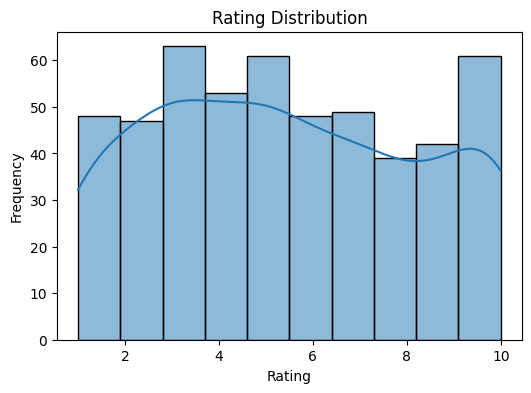

C:\Users\raksh\AppData\Local\Temp\ipykernel_32036\522598192.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette="viridis")


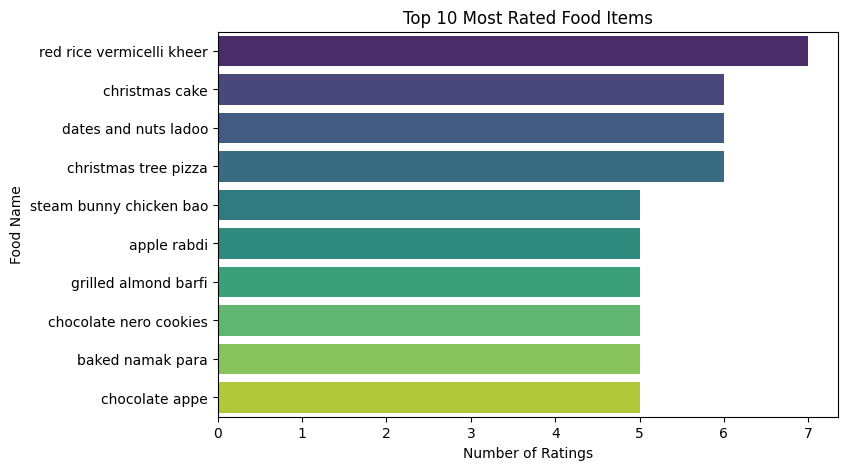

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.histplot(merged_df['Rating'], bins=10, kde=True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

top_rated = merged_df.groupby('Name')['Rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette="viridis")
plt.title("Top 10 Most Rated Food Items")
plt.xlabel("Number of Ratings")
plt.ylabel("Food Name")
plt.show()


In [13]:

merged_df.to_csv("food_recommendation_merged1.csv", index=False)
print("\nfood_recommendation_merged!")


food_recommendation_merged!
